# ガウス過程による回帰実装
https://qiita.com/ctgk/items/4c4607edf15072cddc46

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## カーネル関数の設定

In [14]:
# カーネル関数
class GaussianKernel(object):
    # カーネル関数のパラメータa,bを初期化
    def __init__(self, params):
        assert np.shape(params) ==(2,)
        self.params = params
        
     # x,yを入力としてカーネル関数の値を計算 PRML式(6.63)
    def __call__(self, x, y):
        return self.params[0] * np.exp(-0.5 * self.params[1] * (x - y) ** 2)
    
    def get_params(self):
        return np.copy(self.params)
    
    def derivatives(self, x, y):
        sq_diff = (x - y) ** 2
        
        # パラメータaでの微分
        delta_0 = np.exp(-0.5 * self.params[1] * sq_diff)
        # パラメータbでの微分
        delta_1 = -0.5 * sq_diff * delta_0 * self.params[0]
        
        return (delta_0, delta_1)
    
    def update_parameters(self, updates):
        assert np.shape(updates) == (2,)
        self.params += updates
    

## ガウス過程による回帰

In [16]:
class GaussianProcessRegression(object):
    # カーネル関数とノイズの精度パラメータの初期化
    def __init__(self, kernel, beta=1):
        self.kernel = kernel
        self.beta = beta
    
     # カーネル関数のパラメータ推定を行わずに回帰
    def fit(self, x, t):
        self.x = x
        self.t = t
        
        # グラム行列の計算 PRML式(6.54)
        Gram = self.kernel(*np.meshgrid(x, x)) # meshを作成することで、全ての組み合わせを作る
        
        # 共分散行列の計算 PRML式(6.62)
        self.covariance = Gram + np.identity(len(x)) / self.beta
        
        # 精度行列の計算
        self.precision = np.linalg.inv(self.covariance)
        
        
    # カーネル関数のパラメータの推定を行う回帰
    def fit_kernel(self, x, t, learning_rate=0.1, iter_max=100):
        for i in range(iter_max):
            params = self.kernel.get_params()
            
            # カーネル関数の今のパラメータで回帰
            self.fit(x, t)
            
             # 対数エビデンス関数をパラメータで微分
            gradients = self.kernel.derivatives(*np.meshgrid(x, x))
            
            # パラメータの更新量を計算 PRML式(6.70)
            updates = np.array(
                [-np.trace(self.precision.dot(grad)) + t.dot(self.precision.dot(grad).dot(self.precision).dot(t)) for grad in gradients])
            
            # パラメータを更新
            self.kernel.update_parameters(learning_rate * updates)
            
            # パラメータの更新量が小さければ更新をやめる
            if np.allclose(params, self.kernel.get_params()):
                break
                
            else:
                print("parameters may not have converged")
                
                
    def predict_dist(self, x):

        K = self.kernel(*np.meshgrid(x, self.x, indexing='ij'))
        # 予測分布の平均を計算 PRML式(6.66)
        mean = K.dot(self.precision).dot(self.t)

        # 予測分布の分散を計算 PRML式(6.67)
        var = self.kernel(x, x) + 1 / self.beta - np.sum(K.dot(self.precision) * K, axis=1)

        return mean.ravel(), np.sqrt(var.ravel())

## 学習を実行

parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may

parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may

parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may

parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may

parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may not have converged
parameters may

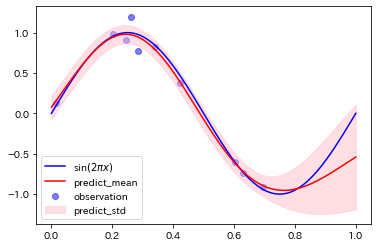

In [17]:

def create_toy_data(func, low=0, high=1., n=10, std=1.):
    x = np.random.uniform(low, high, n)
    t = func(x) + np.random.normal(scale=std, size=n)
    return x, t

def main():
    # 学習データが従う関数を設定
    def func(x):
        return np.sin(2 * np.pi * x)
    # 学習データを生成
    x, t = create_toy_data(func, high=0.7, std=0.1)

    # カーネル関数の設定、パラメータはてきとうに設定
    kernel = GaussianKernel(params=np.array([1., 1.]))
    # ガウス過程回帰に用いるカーネル関数と精度パラメータ(真の値)の設定
    regression = GaussianProcessRegression(kernel=kernel, beta=100)
    # カーネル関数のパラメータの推定も含めた回帰、regression.fit(x,t)に替えるとパラメータを推定せず回帰
    regression.fit_kernel(x, t, learning_rate=0.1, iter_max=10000)

    # テストデータについて予測分布を出力
    x_test = np.linspace(0, 1, 100)
    y, y_std = regression.predict_dist(x_test)

    # 回帰の結果をプロット
    plt.scatter(x, t, alpha=0.5, color="blue", label="observation")
    plt.plot(x_test, func(x_test), color="blue", label="sin$(2\pi x)$")
    plt.plot(x_test, y, color="red", label="predict_mean")
    plt.fill_between(x_test, y - y_std, y + y_std, color="pink", alpha=0.5, label="predict_std")
    plt.legend(loc="lower left")
    plt.show()

main()

# ガウス過程で回帰実装
作者の実装  
https://qiita.com/amber_kshz/items/e385e985fddf78d21f71

In [22]:
import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [23]:
class MyKernel:

    def __init__(self, theta, bounds=None):
        self.theta = theta
        self.bounds = bounds

    def __call__(self, X, Y, eval_gradient=False):
        '''
        This method calcualtes the kernel matrix for input points.

        Parameters
        ----------
        X, Y : 2-D numpy array
            numpy array representing input points. X[n, i] (resp. Y[n, i]) represents the i-th element of n-th point in X (resp Y).
        eval_gradientt : bool
            If True, the gradient of the kernel matrix w.r.t. to parameters are also returned.

        Returns
        ----------
        K : 2-D numpy array, shape = (len(X), len(Y))
            numpy array representing the kernel matrix. K[i, j] stands for k(X[i], Y[j])
        gradK : 3-D numpy array, shape = (len(self.theta), len(X), len(Y)), optional
            numpy array representing the gradient of kernel matrix. gradK[l, m, n] = derivative of K[m, n] w.r.t. self.theta[l]
            Returned only if return_std is True.
        '''

        tmp = np.reshape(np.sum(X**2,axis=1), (len(X), 1)) + np.sum(Y**2, axis=1)  -2 * (X @ Y.T)
        K = self.theta[0]*np.exp(-self.theta[1]/2*tmp) + self.theta[2] + self.theta[3]*(X @ Y.T)

        if not(eval_gradient):
            return K
        else:
            gradK = np.zeros((len(self.theta), len(X), len(Y)))
            gradK[0] = np.exp(-self.theta[1]/2*tmp)
            gradK[1] = -self.theta[0]/2*tmp*np.exp(-self.theta[1]/2*tmp)
            gradK[2] = np.ones((len(X), len(Y)))
            gradK[3] = X @ Y.T
            return K, gradK

    def diag(self, X):
        '''
        This method calculates the diagonal elements of the kernel matrix.

        Parameters
        ----------
        X : 2-D numpy array
            numpy array representing input points. X[n, i] represents the i-th element of n-th point in X.

        Returns
        ----------
        diagK : 1-D numpy array
            numpy array representing the diagonal elements of the kernel matrix. diagK[n] = K[n, n]
        '''
        diagK = self.theta[0] + self.theta[2] + self.theta[3]*np.sum(X**2, axis=1) 
        return diagK

In [24]:
def cost_and_grad(beta, theta, kernel, X, t, return_grad=False):
    '''
    The method calculates cost function (negative of log marginal likelihood) and its gradient

    Parameters
    ----------
    beta : float
        noise parameter (precision)
    theta : 1-D numpy array
        1-D numpy array representing kernel parameteres
    kernel : kernel object
        An object representing kernel function
    X : 2-D numpy array
        Array representing input data, with X[n, i] being the i-th element of n-th point in X.
    t : 1-D numpy array
        Array representing label data.
    return_grad : bool
        If True, the function also returns the gradient of the cost function.

    Returns
    ----------
    val : float
        The value of the cost function
    grad : 1-D numpy array, optional
        Array representing the gradient of the cost function. Returned only if return_grad is True.
    '''
    kernel.theta = theta
    K, gradK = kernel(X, X, eval_gradient=True)
    C = K + 1.0/beta*np.identity(len(K))
    Cinv = np.linalg.inv(C)
    val = np.sum(np.log(eigh(C)[0])) + 0.5 * t @ Cinv @ t + 0.5*len(X)*np.log(2*np.pi)
    if not(return_grad):
        return val
    else:
        grad = np.zeros(len(theta)+1)
        grad[0] = -0.5*np.trace(Cinv)/(beta**2) + 0.5/(beta**2) * (t @ Cinv @ Cinv @ t)
        for cnt in range(len(theta)):
            grad[cnt+1] = 0.5 * np.trace(Cinv @ gradK[cnt]) - 0.5 * t @ Cinv @ gradK[cnt] @ Cinv @ t
        return val, grad


In [25]:
class GPRegression:

    def __init__(self, kernel, beta):
        self.kernel = kernel
        self.beta = beta

    def fit(self, X, t, optimize_hparams=False):
        '''
        Parameters
        ----------
        X : 2-D numpy array
            Array representing training input data, with X[n, i] being the i-th element of n-th point in X.
        t : 1-D numpy array
            Array representing training label data.
        optimize_hparams : bool
            If True, optimization of hyperparameters (noise parameter and kernel parameters) is performed.
        '''
        self.X_train = X
        self.t_train = t
        if optimize_hparams:
            theta_old = np.copy(self.kernel.theta)
            bounds_full = np.concatenate(( [[0, None]], self.kernel.bounds ), axis=0)
            result = minimize(x0=np.append([self.beta], [self.kernel.theta]),
                              fun=lambda x : cost_and_grad(beta=x[0], theta=x[1:], kernel=self.kernel, X=self.X_train, t=self.t_train, return_grad=True), 
                              jac=True,
                              bounds=bounds_full)
            if not(result.success):
                print(result.message)
                self.kernel.theta = theta_old
            else:
                print(result.message)
                self.beta = result.x[0]
                self.kernel.theta = result.x[1:]
        self.Cinv = np.linalg.inv( self.kernel(self.X_train, self.X_train) + 1.0/self.beta*np.identity(len(self.X_train)) )


    def predict(self, X, return_std=False):
        '''       
        Parameters
        ----------
        X : 2-D numpy array
            Array representing test input data, with X[n, i] being the i-th element of n-th point in X.
        return_std : bool
            If True, predictive standard deviation is also returned.

        Returns
        ----------
        mean : 1-D numpy array
            Array representing predictive mean.
        std : 1-D numpy array, optional
            Array reprensenting predictive standard deviation, returned only if return_std is True.
        '''
        kappa = self.kernel(X, self.X_train)
        mean = kappa @ (self.Cinv @ self.t_train)
        if not(return_std):
            return mean
        else:
            std = np.sqrt( self.kernel.diag(X) + 1.0/self.beta - np.diag( kappa @ self.Cinv @ (kappa.T) ) )
            return mean, std

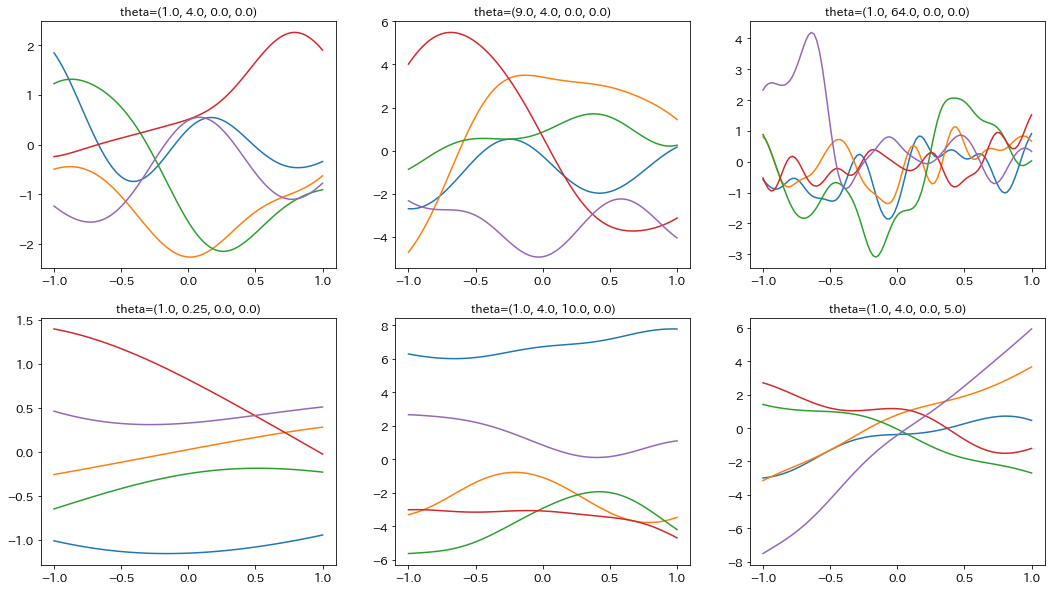

In [27]:
X = np.linspace(-1,1,101)
X = np.reshape(X, (len(X),-1))
Thts = np.array([[1.0, 4.0, 0.0, 0.0],
                 [9.0, 4.0, 0.0, 0.0],
                 [1.0, 64.0, 0.0,0.0],
                 [1.0,0.25, 0.0, 0.0],
                 [1.0, 4.0, 10.0, 0.0],
                 [1.0, 4.0, 0.0, 5.0]
                ])

num  = 5
cnt = 0
fig = plt.figure(figsize=(18,10))
while cnt < len(Thts):
    theta = Thts[cnt]
    kernel = MyKernel(theta)
    Kmat = kernel(X, X)
    yy = np.random.multivariate_normal(np.zeros(len(X)), Kmat, num)
    ax = fig.add_subplot(2,3,cnt+1)
    for y in yy:
        ax.plot(X, y)
    ax.set_title(f"theta=({theta[0]}, {theta[1]}, {theta[2]}, {theta[3]})")
    cnt += 1

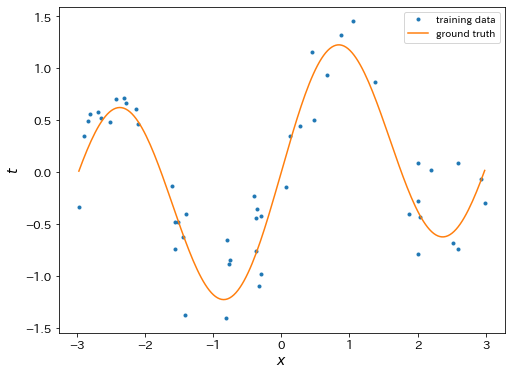

In [28]:
def truef(x):
    return np.sin(2*x)  + 0.2*np.sin(x) + 0.1*x

N = 50
X = np.random.uniform(-3, 3, N)
ep = 0.3*np.random.randn(N)
t = truef(X) + ep

Xcont = np.linspace(np.min(X),np.max(X),200) # for plotting

plt.figure(figsize=(8,6))
plt.plot(X, t,'.', label='training data')
plt.plot(Xcont, truef(Xcont), label='ground truth')
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.legend()
plt.show()

X = np.reshape(X,(len(X),1))
Xtest = np.reshape(Xcont,(len(Xcont),1))

In [29]:
def plot_result(pred_mean, pred_std, ax=None):
    if ax is None:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111)
    ax.plot(X, t,'.',label='training data')
    ax.plot(Xcont, pred_mean, label='predictive mean')
    ax.plot(Xcont, truef(Xcont), ':', label='ground truth')
    ax.fill_between(Xcont, pred_mean + pred_std, pred_mean - pred_std, alpha=0.2)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$t$')
    ax.legend()

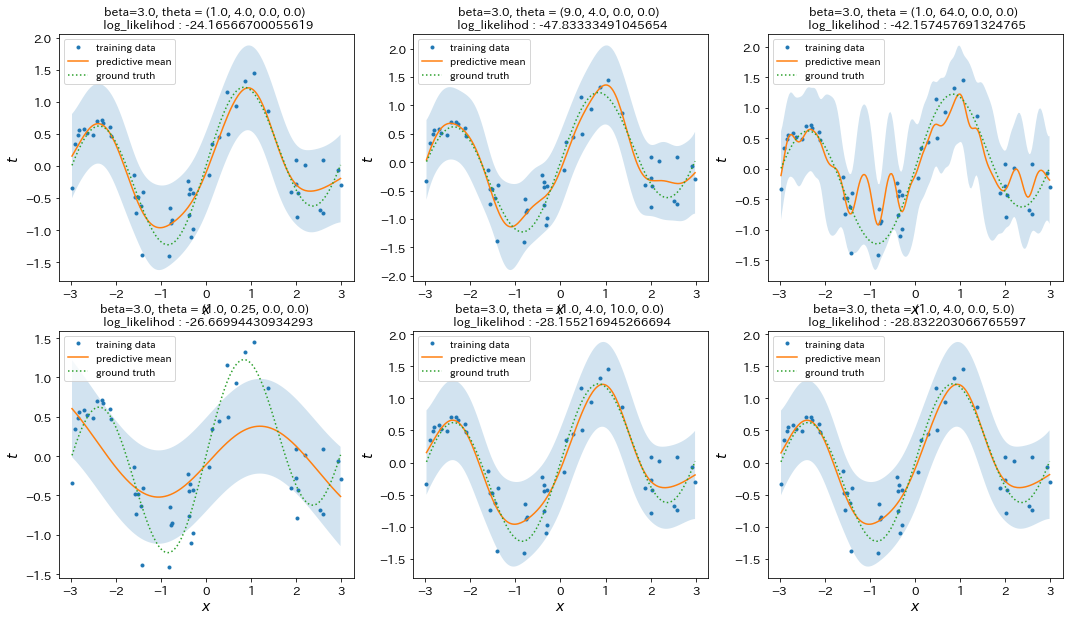

In [30]:
Thts = np.array([[1.0, 4.0, 0.0, 0.0],
                 [9.0, 4.0, 0.0, 0.0],
                 [1.0, 64.0, 0.0,0.0],
                 [1.0,0.25, 0.0, 0.0],
                 [1.0, 4.0, 10.0, 0.0],
                 [1.0, 4.0, 0.0, 5.0]
                ])

beta = 3.0

kernel = MyKernel(theta = np.array([0.0, 0.0, 0.0, 0.0]), bounds=[[0.0, None],[0.0, None],[0.0, None],[0.0, None]])
gpr = GPRegression(kernel=kernel, beta=beta)

fig = plt.figure(figsize=(18,10))
cnt = 0
while cnt < len(Thts):
    theta = Thts[cnt]
    kernel.theta = theta
    gpr.fit(X, t)
    mean, std = gpr.predict(Xtest, return_std=True)
    ax = fig.add_subplot(2, 3, cnt+1)
    plot_result(mean, std, ax)
    ax.set_title(f"beta={gpr.beta}, theta = ({theta[0]}, {theta[1]}, {theta[2]}, {theta[3]}) \n log_likelihod : {-cost_and_grad(beta=gpr.beta, theta=gpr.kernel.theta, kernel=gpr.kernel, X=X, t=t, return_grad=False)}")
    cnt += 1
plt.show()

b'ABNORMAL_TERMINATION_IN_LNSRCH'
beta = 1.0
theta=[2.   1.   0.01 0.02]
log_likelihod : -65.21906149972348


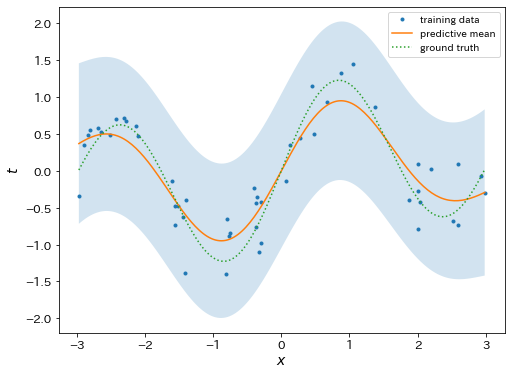

In [31]:
kernel = MyKernel(theta = np.array([2.0, 1.0, 0.01, 0.02]), bounds=[[0.0, None],[0.0, None],[0.0, None],[0.0, None]])
gpr = GPRegression(kernel=kernel, beta=1.0)
gpr.fit(X, t, optimize_hparams=True)
mean, std = gpr.predict(Xtest, return_std=True)
print(f"beta = {gpr.beta}")
print(f"theta={kernel.theta}")
print(f"log_likelihod : {-cost_and_grad(beta=gpr.beta, theta=gpr.kernel.theta, kernel=gpr.kernel, X=X, t=t, return_grad=False)}")
plot_result(mean, std)

## scikit-learnによる実装

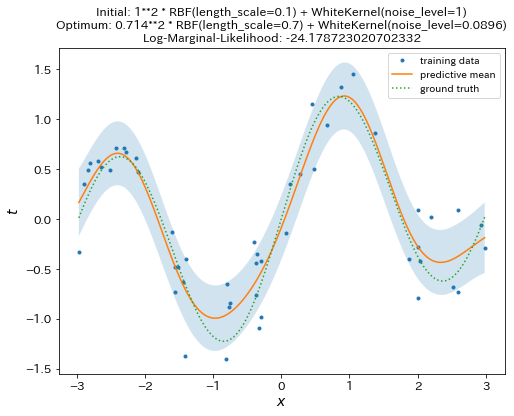

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = 1.0 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1e2)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 3e+1))
gp = GaussianProcessRegressor(kernel=kernel,alpha=0.0)

# fitting 
gp.fit(X, t)

# prediction
y_mean, y_std = gp.predict(Xtest, return_std=True)

# plotting
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
plot_result(y_mean, y_std, ax)
ax.set_title(f"Initial: {kernel}\n\
Optimum: {gp.kernel_}\n\
Log-Marginal-Likelihood: {gp.log_marginal_likelihood(gp.kernel_.theta)}")
plt.show()